# Decision Trees
(by Tevfik Aytekin)


### Generate synthetic data

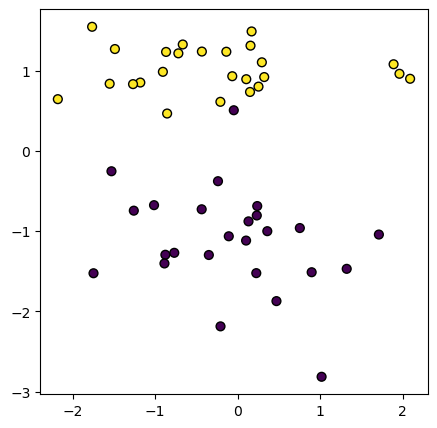

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
from sklearn.metrics import classification_report


X, y = make_classification(n_samples = 50, n_features=2, n_redundant=0, n_informative=1, class_sep=1,
                             n_clusters_per_class=1)

plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='k');


### make_classification
[Python documentation](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)

### Decision Tree Classification

/tmp/ipykernel_30575/1075941584.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax[1].scatter(X[idx, 0], X[idx, 1], c=color,


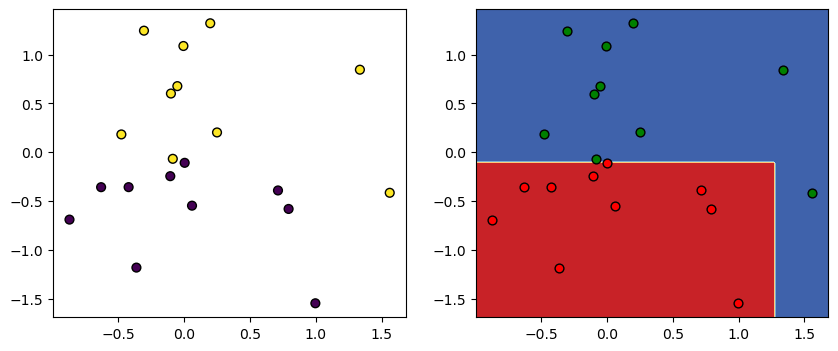

In [2]:
# Play with class_sep and observe the result
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Try different random states
X, y = make_classification(n_samples = 20, n_features=2, n_redundant=0, n_informative=1, class_sep=0.5,
                             n_clusters_per_class=1, random_state=5)

fig, ax = plt.subplots(1,2,figsize=(10,4));

ax[0].scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_step = 0.02
n_classes = 2
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
#plt.tight_layout(h_pad=0.2, w_pad=0.2, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    ax[1].scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

### Draw Decision Tree

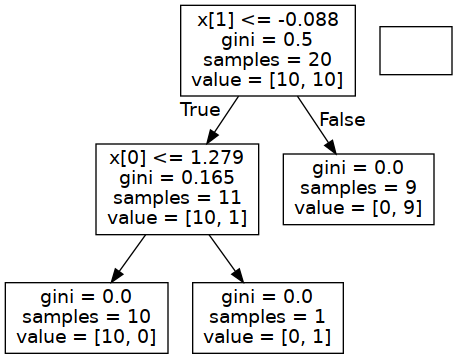

In [3]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
# Show graph
Image(graph.create_png())

### Multiclass Classification

/tmp/ipykernel_30575/1307598336.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,


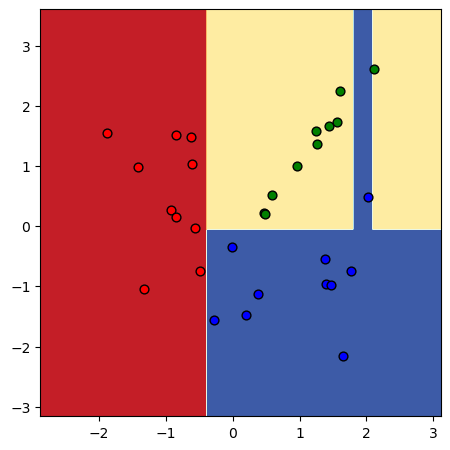

In [4]:
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=1,
                             n_clusters_per_class=1, random_state=2, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
# You can play with n_neighbors
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

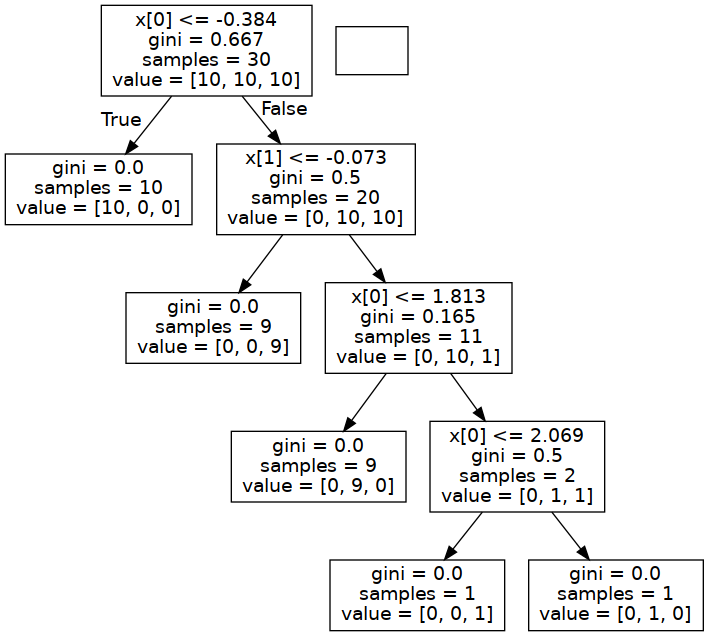

In [5]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Overfitting

/tmp/ipykernel_30575/3940033049.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,


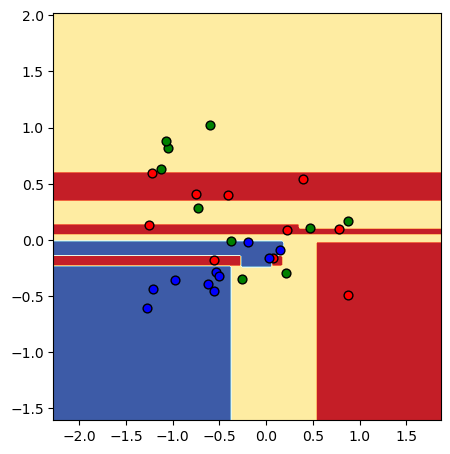

In [6]:
# Note that class_sep=0.2
plt.figure(figsize=(5,5))
X, y = make_classification(n_samples = 30, n_features=2, n_redundant=0, n_informative=2, class_sep=0.2,
                             n_clusters_per_class=1, random_state=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)

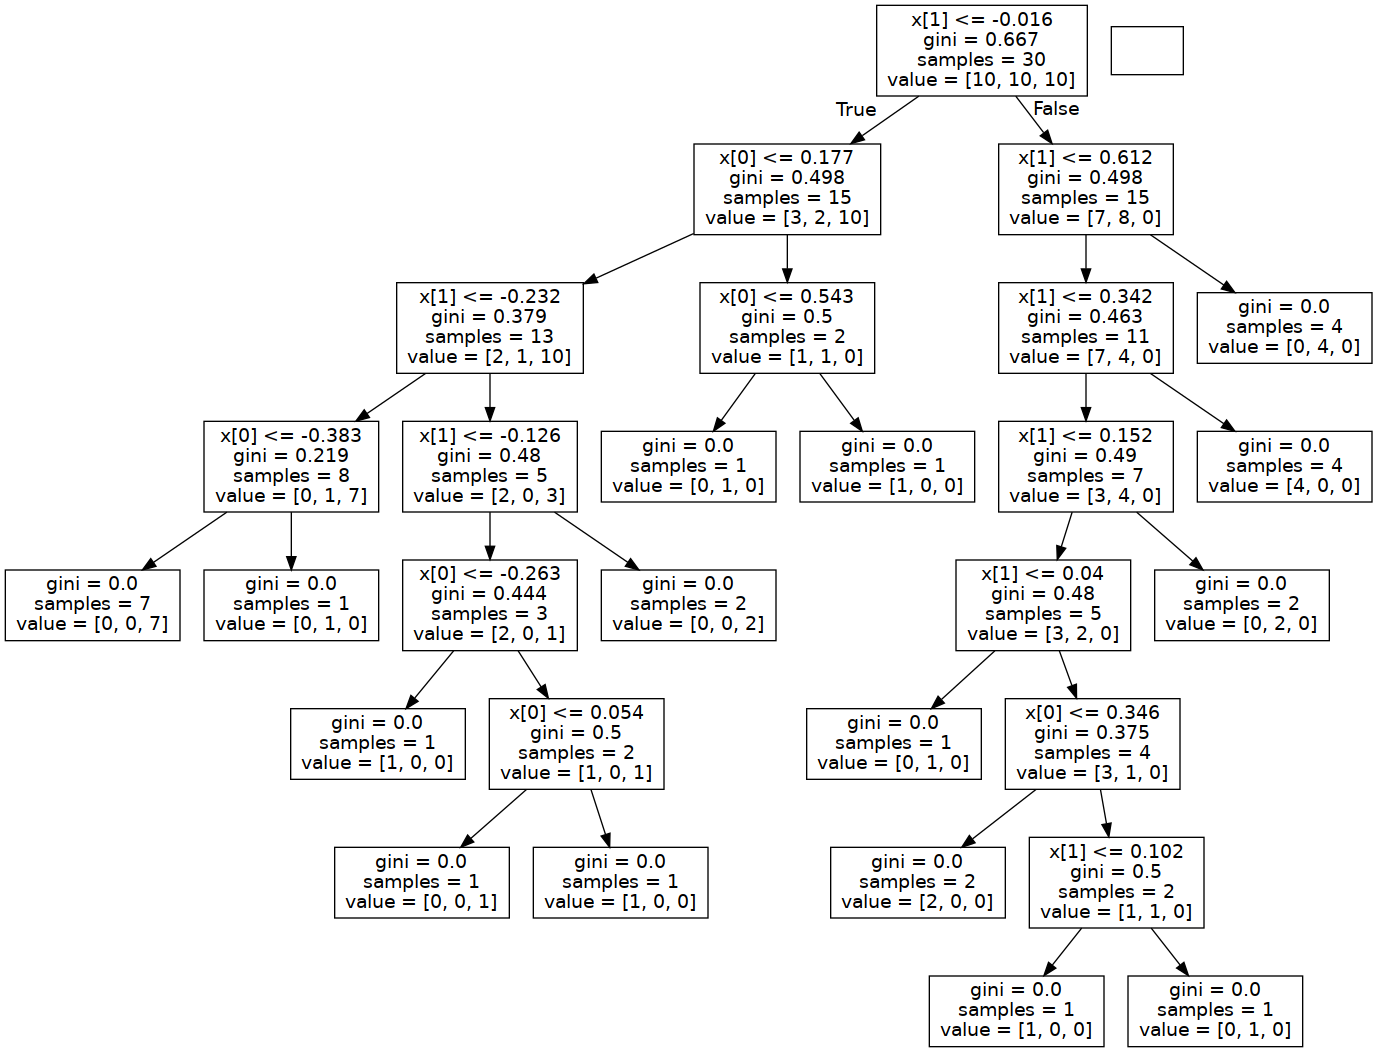

In [7]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### min_samples_split
The minimum number of samples required to split an internal node, we can use it to prevent splitting nodes with few instances. This often helps overfitting.

/tmp/ipykernel_30575/1920864225.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color,


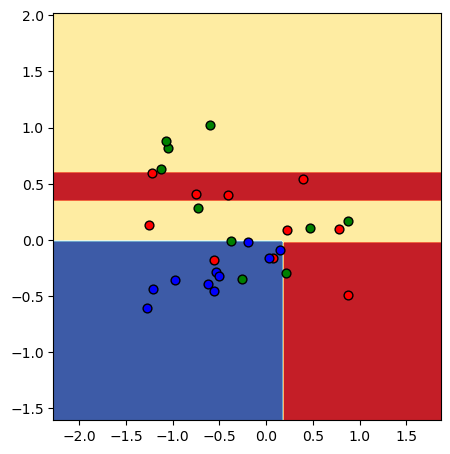

In [8]:
# you can play with the min_samples_split parameter.
plt.figure(figsize=(5,5))
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=40, edgecolor='black');

clf = DecisionTreeClassifier(min_samples_split=10)
clf.fit(X, y)
plot_step = 0.02
n_classes = 3
plot_colors = "rgb"

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, 
                cmap=plt.cm.RdYlBu, edgecolor='black', s=40)



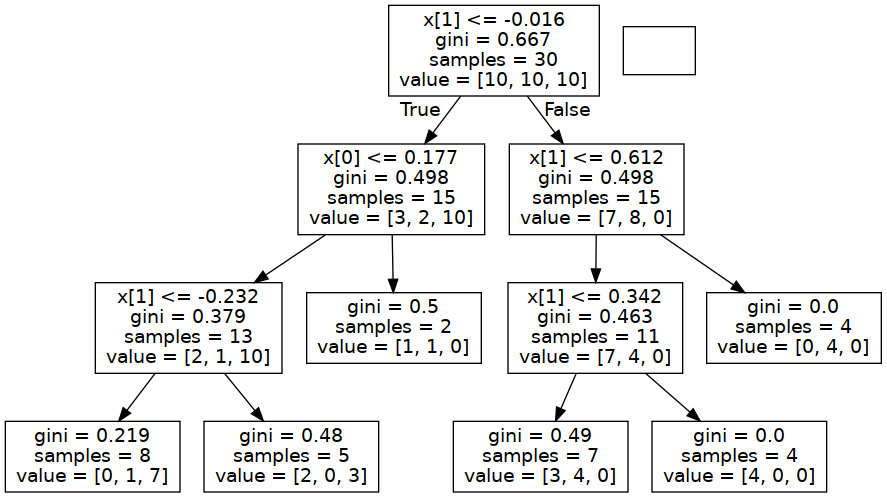

In [9]:
from sklearn import tree
import pydotplus
from IPython.display import Image  

dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Bank Marketing Dataset

In [12]:
# Bank Marketing Dataset from
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../../datasets/bank/bank-full.csv", delimiter = ";")

# print first 5 examples
bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
bank.y.value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

In [14]:
bank_majority = bank[bank.y=="no"]
bank_minority = bank[bank.y=="yes"]
 
# downsample
bank_majority_downsampled = resample(bank_majority, 
                                 replace=False,    
                                 n_samples=5289) 
 
bank_balanced = pd.concat([bank_minority, bank_majority_downsampled])
bank_balanced.y.value_counts()

y
yes    5289
no     5289
Name: count, dtype: int64

In [16]:
X = bank_balanced.loc[:,'age':'poutcome']
y = bank_balanced.loc[:,'y']
y = y.replace(["yes","no"],[1,0])
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
X_train = X_train.fillna(X_train.mean())
X_test = X_test.fillna(X_test.mean())
 
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train);

y_pred1 = clf.predict(X_test)  

print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

           0       0.85      0.75      0.80       555
           1       0.75      0.86      0.80       503

    accuracy                           0.80      1058
   macro avg       0.80      0.80      0.80      1058
weighted avg       0.81      0.80      0.80      1058



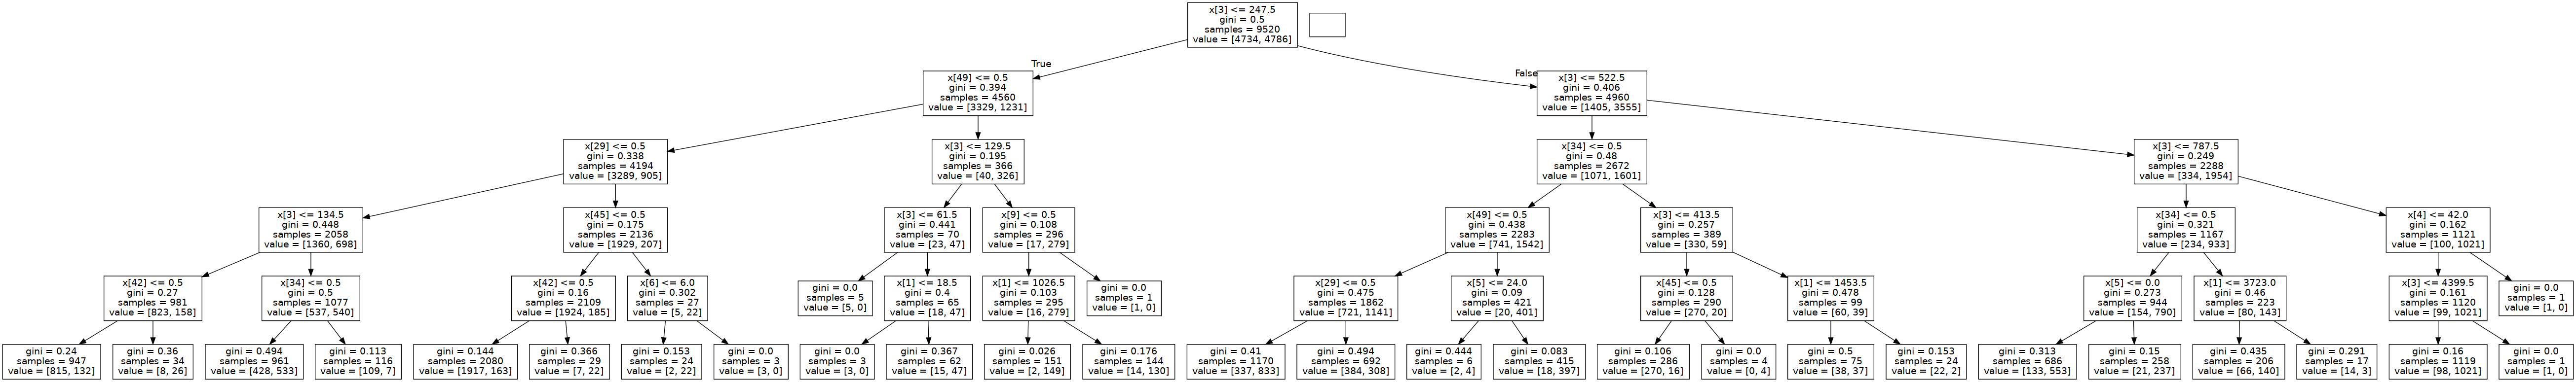

In [18]:
dot_data = tree.export_graphviz(clf, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Decision Tree Regression

Decision trees can also be used for regression. Much of the algorithm is similar to building classification trees. The key difference is, the value which minimizes the following sum of squared error is chosen as the splitting point. In other words the split point is where the reduction in variance is maximum.

$$SSE=\sum_{i \in R_1}(y_i - \bar y_1)^2+\sum_{i \in R_2}(y_i - \bar y_2)^2$$

where $\bar y_1$ and $\bar y_2$ are the mean values in regions $R_1$ and $R_2$.

You can play with the following data to better understand how split points are chosen in order to reduce variance.

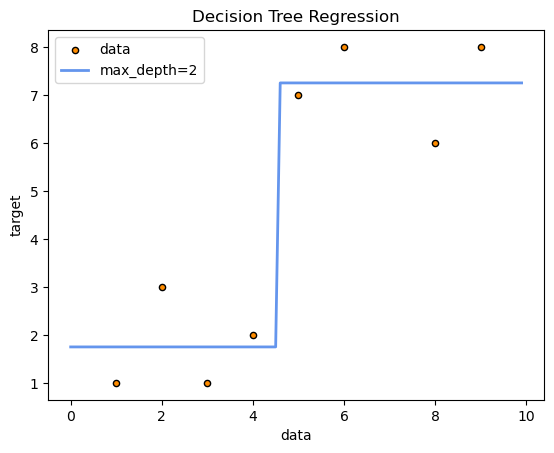

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X = np.array([1,2,3,4,5,6,7,8,9]);
X = X.reshape(-1,1)
y = [1,3,1,2,7,8,9,6,8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01)

regr_1 = DecisionTreeRegressor(max_depth=1)
#play with max_depth
regr_1.fit(X_train, y_train)

# Predict
X_test = np.arange(0, 10, 0.1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

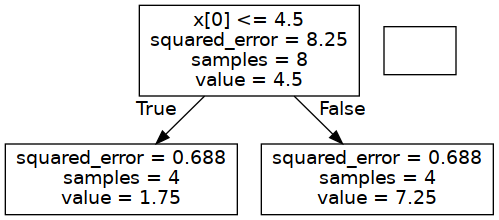

In [20]:
dot_data = tree.export_graphviz(regr_1, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

(12, 1) (12,)
(2, 1) (2,)


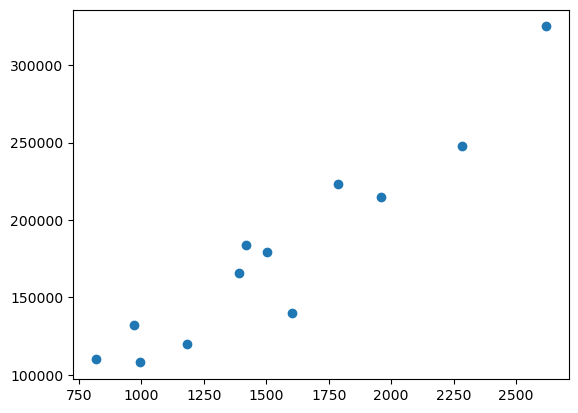

In [22]:

train = pd.read_csv("../../datasets/house_prices/train.csv")
train2 = train[(train.GrLivArea < 4000) & (train.SalePrice < 400000)]
train2 = train2.sample(frac=0.01)
X = train2[['GrLivArea']]
y = train2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
plt.scatter(X_train, y_train)

/home/tevfik/anaconda3/lib/python3.9/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


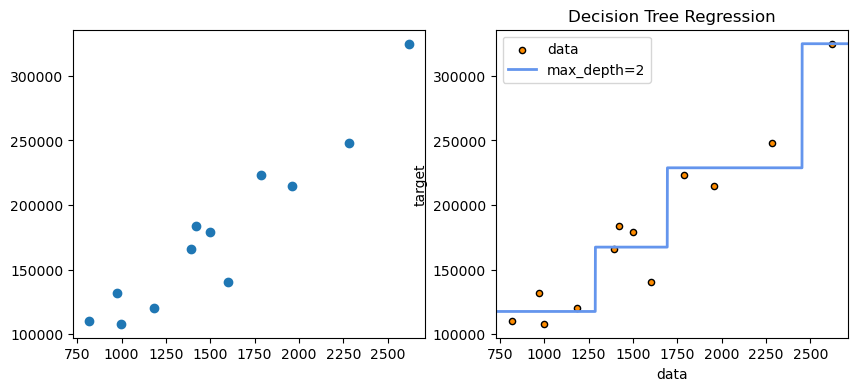

In [23]:

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
#increase max_depth to 4 to see overfitting

regr_1.fit(X_train, y_train)

# Predict
X_test = np.arange(0.0, 3000.0, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)


fig, ax = plt.subplots(1,2,figsize=(10,4));

# Plot the results
ax[0].scatter(X_train, y_train)

ax[1].set_ylim(ax[0].get_ylim())
ax[1].set_xlim(ax[0].get_xlim())
ax[1].scatter(X_train, y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
ax[1].plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()







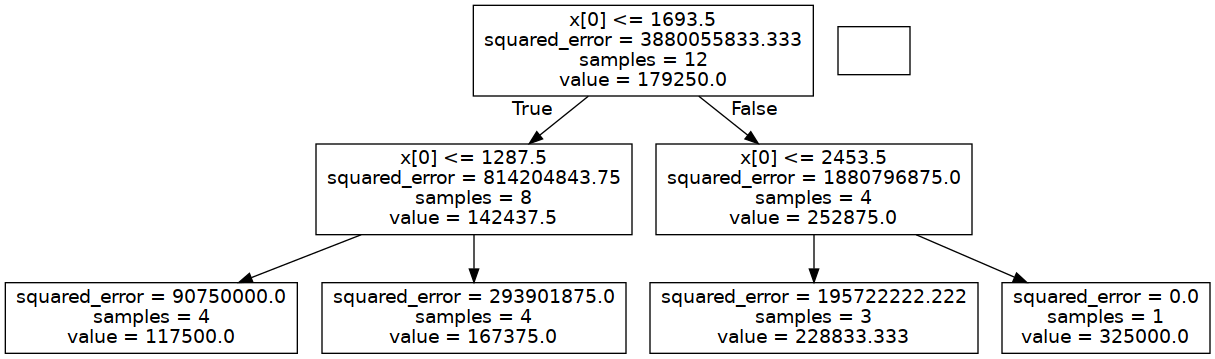

In [24]:
dot_data = tree.export_graphviz(regr_1, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

### Decision Tree vs. Linear Regression

<img src="images/ubend.jpeg" style="max-width:100%; width: 30%">
[image source](https://https://www.economist.com/christmas-specials/2010/12/16/the-u-bend-of-life)

In [ ]:
age = np.arange(18, 88)
h1 = np.arange(6.8, 6.2, -0.02)
h2 = np.arange(6.2, 7, 0.02)
h = h1.tolist()+h2.tolist()
plt.plot(age,h)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression tree
regr_1 = DecisionTreeRegressor(max_depth=5)
#play with max_depth
age = age.reshape(age.size,1)
regr_1.fit(age, h)

# Predict
X_test = np.arange(18, 88.0, 1)[:, np.newaxis]
y_1 = regr_1.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(age, h, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
#plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [ ]:
# fit a linear model
from sklearn import linear_model

model = linear_model.LinearRegression()
model = model.fit(age, h)
y_1 = model.predict(X_test)
plt.scatter(age, h, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)

In [ ]:
# Run Regression Tree with top correlated 10 attributes with SalePrice
from sklearn.metrics import mean_squared_log_error
def kaggle_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error(y_true, y_pred));
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

cors = train.corr(); 
top10 = cors.loc[:, "SalePrice"].sort_values(ascending = False).head(11)
top10 = top10.index.values.tolist()
top10.pop(0)


X = train.loc[:,top10]
y = train.loc[:,'SalePrice']

mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    #X_train = X_train.fillna(X_train.mean())
    #X_test = X_test.fillna(X_test.mean())


    regr = DecisionTreeRegressor(max_depth=5)
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))

print(top10)

dot_data = tree.export_graphviz(regr, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [ ]:
top10

In [ ]:
model.feature_importances_

In [ ]:
# run Regression Tree with full data
X = train.loc[:,'MSSubClass':'SaleCondition']
y = train.loc[:,'SalePrice']
X = pd.get_dummies(X)
mae, kaggle, mape = [], [], []
for i in range(1,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
    X_train = X_train.fillna(X_train.mean())
    X_test = X_test.fillna(X_test.mean())

    regr = DecisionTreeRegressor()
    model = regr.fit(X_train, y_train)
    
    test_predictions = model.predict(X_test)
    mae.append(mean_absolute_error(y_test, test_predictions))
    kaggle.append(kaggle_score(y_test, np.abs(test_predictions)))
    mape.append(mean_absolute_percentage_error(y_test, test_predictions))

print("Test MAE:", np.mean(mae))
print("Test Kaggle-Score:", np.mean(kaggle))
print("Test MAPE:", np.mean(mape))


dot_data = tree.export_graphviz(regr, out_file=None) 
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())